Clase 14
===

Objetivos

* Repaso de sistemas de ecuaciones diferenciales ordinarias (ODE)
* Resolución de ODEs con scipy.
* Resolución de ejercicio de Clase 12

Hoy, el foco de la clase es la resolución de ecuaciones diferenciales (ODEs por su acrónimo en inglés) ordinarias en Python. 

Nota: Los siguientes dos ejemplos fueron extraidos desde [aquí](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations).

Ejercicio 1
-------------

Resolver el siguiente ODE:

$\frac{dy}{dt}=-ky$

con condición inicial $y_0=5$, y un valor de $k=0.3$.

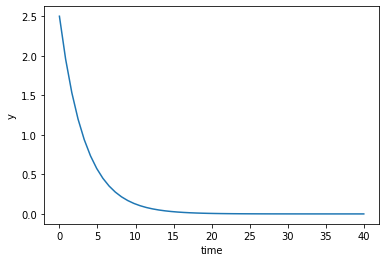

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 2.5

# time points
t = np.linspace(0,40)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y')
plt.show()

Ejercicio 2
-------------

Resolver el siguiente ODE anterior pero esta vez para valores de $k$ igual a 0.1, 0.2, y 0.5.

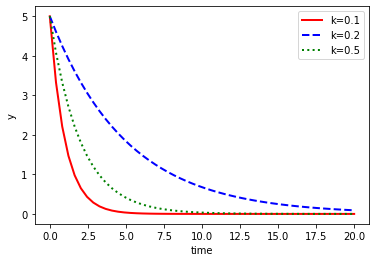

In [61]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,params):
    k,alpha = params
    dydt = -k * y/alpha
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
params = [0.1,0.1] # [k,alpha
y1 = odeint(model,y0,t,args=(params,))
params = [0.2,1]
y2 = odeint(model,y0,t,args=(params,))
params = [0.5,1]
y3 = odeint(model,y0,t,args=(params,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.show()

Ejercicio 3: Reactor por lotes
-----------

Veamos como resolver un sistema ODE. Por ejemplo, consideremos el siguiente sistema describiendo las concentraciones de biomasa ($X$) y glucosa ($G$):
    
<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase13_reactor.png" alt="Drawing" style="width: 600px;"/>    
    
    
El cual puede ser descrito matematicamente como:

\begin{align}
\frac{dX}{dt} &= \mu X\\
\frac{dG}{dt} &= -q_G \mu X
\end{align}

En donde $q_G$ es el consumo especifico de glucosa. Ten en cuenta que la velocidad de crecimiento especifica ($\mu$) varia con la concentración de glucosa con una cinética tipo Monod:

$\mu = \mu_M \frac{G}{K+G}$


Resuelve este sistema ODE considerando 70 horas de operación del reactor y con $\mu_M=0.15$, $K=0.1$, $q_G=1.1$, y condiciones iniciales $X_0=0.1$ y $G_0=20$.
   

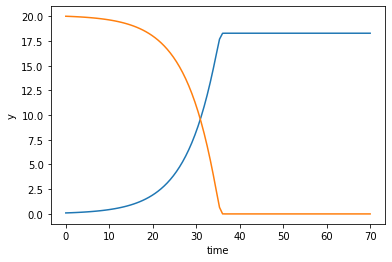

In [62]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(var,t,params):
    x,g   = var
    um,k,qp = params
    k = 0.3
    
    u=um*g/(k+g)
    
    deriv = [0,0]
    deriv[0] = u*x
    deriv[1] = -qp*u*x
    return deriv

# initial condition
var0 = [0.1,20] # x,g

# time points
t = np.linspace(0,70,100)

# solve ODE
params=[0.15,0.1,1.1] #um,k,qp
y = odeint(model,var0,t,args=(params,))

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y')
plt.show()

Ejercicio 4: Aplicación en cinética enzimática
-------------

Veamos como resolver un sistema de ecuaciónes diferenciales ordinarias a través de un problema concreto: cinética enzimática

Una reacción enzimática puede ser modelada como:

<img src="https://raw.githubusercontent.com/modcommet/Clases/master/clase10_enzyme_reaction.png" alt="Drawing" style="width: 400px;"/>

De manera mas formal: un substrato $S$ reacciona con una enzima $E$ para formar un complejo $ES$ que es convertido en producto $P$ y en enzima disociada:

\begin{equation}
E+S \overset{k_1}{ \underset{k_{2}}{\rightleftharpoons}} ES \stackrel{k_3}{\rightarrow} E + P
\end{equation}

La primera reacción es reversible con constantes cinéticas de unión y desunion del complejo ES iguales a $k_1$ y $k_2$, respectivamente. La segunda reacción es irreversible con constante cinética $k_3$. El comportamiento cinético de estas reacciones es descrito por el siguiente set de ecuaciones diferenciales:

\begin{align}
\frac{d[S]}{dt} &= -k_1[E][S]+ k_2[ES]\\
\frac{d[E]}{dt} &= -k_1[E][S]+ (k_{2}+k_3)[ES]\\
\frac{d[ES]}{dt} &= k_1[E][S]- (k_{2}+k_3)[ES]\\
\frac{d[P]}{dt} &= k_3[ES]\\
\end{align}

Con condiciones iniciales:

$[S]_{t=0}=1,[E]_{t=0}=2,[ES]_{t=0}=0,[P]_{t=0}=0$

y parametros:

$k_1=0.5$, $k_2=0.25$, y $k_3=0.25$



Resolver el sistema dinámico hasta un timpo final de 30 horas.

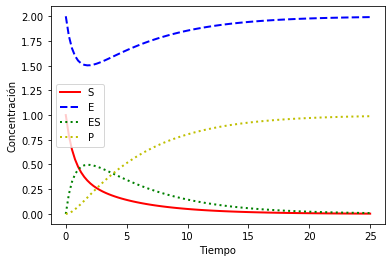

In [2]:
# function that returns dy/dt
def model(var,t,params):
    S,E,ES,P = var
    k1,k2,k3 = params

    deriv = [0,0,0,0]
    deriv[0]=(-k1*E*S)+(k2*ES)
    deriv[1]=(-k1*E*S)+(k2+k3)*ES
    deriv[2]=k1*E*S-(k2+k3)*ES
    deriv[3]=k3*ES
    return deriv

# initial condition
var0 = [1,2,0,0]

# time points
t = np.linspace(0,30,100)

#solve ODE
params=[0.5,0.25,0.25]
y = odeint(model,var0,t,args=(params,))

# plot results
plt.plot(t,y[:,0],'r-',linewidth=2,label='S')
plt.plot(t,y[:,1],'b--',linewidth=2,label='E')
plt.plot(t,y[:,2],'g:',linewidth=2,label='ES')
plt.plot(t,y[:,3],'y:',linewidth=2,label='P')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.show()

Ejercicio 5: Reacciones metabólicas oscilantes
-------------

Consideremos un par de reacciones en donde la concentración de uno de los reactantes $A$ es mucho mayor que su valor de equilibrio. En este caso, la reacción que consume $A$ es mucho mayor la reacción que lo produce. Además, consideremos dos metabolitos intermediarios $X$ e $Y$ que catalizan sus propias reacciones de consumo (forman reacciones autocataliticas):

\begin{align}
A + X \rightarrow 2X \\
X + Y \rightarrow 2Y \\
Y \rightarrow E
\end{align}

La variación en el tiempo de $X$ e $Y$ es descrita por el siguiente sistema ODE:

\begin{align}
\frac{dX}{dt} &= k_1 AX - k_2XY\\
\frac{dY}{dt} &= k_2XY - k_3Y
\end{align}

en donde $k_1$, $k_2$ y $k_3$ son constantes cinéticas. Este sistema da lugar a un comportamiento oscilatorio para $X$ e $Y$.

Considerando $A$, $k_1$, $k_2$, y $k_3$ constantes, resuelve el sistema ODE. Para tus cálculos tiene libre elección para asignar  valores a las constantes y condiciones iniciales.

Ejercicio 6: Resolución de problema de minimización de la clase 12
--------------    

La siguiente es la ecuación de una curva de títulación potenciometrica de una solución con metales pesados cuando al medio se agrega espirulina (biomasa de alga). Esta curva depende de la concentración de acido en el medio (medido como pH). Para modelar la relación entre el potencial y concentración de acido se puede usar la ecuación propuesta por [Chojnacka et al](https://www.sciencedirect.com/science/article/pii/S0045653504009026?casa_token=ApCxvb4D1bEAAAAA:yJXgN3HxFbHE4NpQF0yzuQgdTNwyObIuXsFBhVpkbtWuCbg7ogjpd4yLm-rVIYac7fPAq97b9yk):

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase12_equation.png" width="500">

La cual depende de 6 parametros: $K_{a1},K_{a2},K_{a3},a,b$ y $c$

Ejercicio:

Si los valores de pH y Xadd son:

```python
pH=[1.00000000e-02, 1.56333333e+00, 3.11666667e+00, 4.67000000e+00,
       6.22333333e+00, 7.77666667e+00, 9.33000000e+00, 1.08833333e+01,
       1.24366667e+01, 1.39900000e+01]
Xadd=[1.36349767, 0.8879697 , 0.85343802, 0.85242845, 0.85237857,
       0.85160556, 0.82511459, 0.44761206, 0.19211348, 0.18024773]
```

Ejercicio
------------

1. Haz el gráifco de pH (eje x) vs Xadd (eje y)
2. Estima el valor de los parámetros $K_{a1},K_{a2},K_{a3},a,b$ y $c$